In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

In [2]:
!nvidia-smi

Thu May 11 16:54:28 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090         Off| 00000000:01:00.0  On |                  N/A |
| 80%   65C    P0              163W / 350W|    333MiB / 24576MiB |     13%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Load GoEmotions

In [3]:
train_text = pkl.load(open('./data/c4ai_clip/train_text.pkl', "rb"))[['text', 'grouped_label']]
test_text = pkl.load(open('./data/c4ai_clip/test_text.pkl', "rb"))[['text', 'grouped_label']]

In [4]:
train_text["text"] = train_text["text"].apply(lambda x: "[SEP] " + x + " [SEP]")
test_text["text"] = test_text["text"].apply(lambda x: "[SEP] " + x + " [SEP]")

In [5]:
test_text

,text,grouped_label
0,I’m really sorry about your situation :( Altho...,sadness
1,It's wonderful because it's awful. At not with.,joy
2,"Kings fan here, good luck to you guys! Will be...",joy
3,"I didn't know that, thank you for teaching me ...",joy
4,They got bored from haunting earth for thousan...,neutral
...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,joy
5423,Well that makes sense.,joy
5424,Daddy issues [NAME],neutral
5425,So glad I discovered that subreddit a couple m...,joy


## Load Meld and IEMOCAP

In [6]:
train_df_erc = pd.read_csv("train_text_df.csv", index_col=0).rename(columns={"utterance":"text"})
train_df_erc["path"] = train_df_erc["path"].apply(lambda x: '/home/vmachado/Documents/' + x)
train_df_erc

,text,label,path
0,"[SEP] OK, we got the cole slaw, we got the bu...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
1,"OK, we got the cole slaw, we got the buns... [...",disgust,/home/vmachado/Documents/multimodal-datasets/M...
2,We've got the ground-up flesh of formerly cute...,neutral,/home/vmachado/Documents/multimodal-datasets/M...
3,"[SEP] Wait a minute, hold it. Johnson! Will ...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
4,"Wait a minute, hold it. Johnson! Will you com...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
...,...,...,...
15862,"God, that's like a whole problem with like-- B...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15863,"if you ever come out to Montgomery, I mean, yo...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15864,"I'll [SEP] call up the Sprint call center and,...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15865,"Wow, alright. Well, thanks. And, uh, you- you ...",neutral,/home/vmachado/Documents/multimodal-datasets/I...


In [7]:
test_df_erc = pd.read_csv("test_text_df.csv", index_col=0).rename(columns={"utterance":"text"})
test_df_erc["path"] = test_df_erc["path"].apply(lambda x: '/home/vmachado/Documents/' + x)
test_df_erc

,text,label,path
0,"[SEP] Brian, I need help. [SEP] Babe, I don't...",sadness,/home/vmachado/Documents/multimodal-datasets/I...
1,"Brian, I need help. [SEP] Babe, I don't know w...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
2,I don't--I'm just--I'm thinking maybe I should...,neutral,/home/vmachado/Documents/multimodal-datasets/I...
3,"Well, of course not, but what are you going to...",anger,/home/vmachado/Documents/multimodal-datasets/I...
4,"I don't know. I mean, what am I supposed to d...",anger,/home/vmachado/Documents/multimodal-datasets/I...
...,...,...,...
2753,Exactly. [SEP] You've tasted it? You've tasted...,surprise,/home/vmachado/Documents/multimodal-datasets/M...
2754,You've tasted it? You've tasted it. [SEP] Uh h...,neutral,/home/vmachado/Documents/multimodal-datasets/M...
2755,"Uh huh. [SEP] Oh, you've tasted it. [SEP] You ...",anger,/home/vmachado/Documents/multimodal-datasets/M...
2756,"Oh, you've tasted it. [SEP] You can keep sayin...",neutral,/home/vmachado/Documents/multimodal-datasets/M...


In [8]:
test_df_erc["source"] = test_df_erc["path"].apply(lambda x: "meld" if "MELD" in x else "iemocap")
test_df_erc

,text,label,path,source
0,"[SEP] Brian, I need help. [SEP] Babe, I don't...",sadness,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
1,"Brian, I need help. [SEP] Babe, I don't know w...",neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
2,I don't--I'm just--I'm thinking maybe I should...,neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
3,"Well, of course not, but what are you going to...",anger,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
4,"I don't know. I mean, what am I supposed to d...",anger,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
...,...,...,...,...
2753,Exactly. [SEP] You've tasted it? You've tasted...,surprise,/home/vmachado/Documents/multimodal-datasets/M...,meld
2754,You've tasted it? You've tasted it. [SEP] Uh h...,neutral,/home/vmachado/Documents/multimodal-datasets/M...,meld
2755,"Uh huh. [SEP] Oh, you've tasted it. [SEP] You ...",anger,/home/vmachado/Documents/multimodal-datasets/M...,meld
2756,"Oh, you've tasted it. [SEP] You can keep sayin...",neutral,/home/vmachado/Documents/multimodal-datasets/M...,meld


In [9]:
test_df_erc.groupby("source").count()

,text,label,path
source,,,
iemocap,1650,1650,1650
meld,1108,1108,1108


## Join datasets

In [10]:
train_df_erc

,text,label,path
0,"[SEP] OK, we got the cole slaw, we got the bu...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
1,"OK, we got the cole slaw, we got the buns... [...",disgust,/home/vmachado/Documents/multimodal-datasets/M...
2,We've got the ground-up flesh of formerly cute...,neutral,/home/vmachado/Documents/multimodal-datasets/M...
3,"[SEP] Wait a minute, hold it. Johnson! Will ...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
4,"Wait a minute, hold it. Johnson! Will you com...",neutral,/home/vmachado/Documents/multimodal-datasets/M...
...,...,...,...
15862,"God, that's like a whole problem with like-- B...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15863,"if you ever come out to Montgomery, I mean, yo...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15864,"I'll [SEP] call up the Sprint call center and,...",neutral,/home/vmachado/Documents/multimodal-datasets/I...
15865,"Wow, alright. Well, thanks. And, uh, you- you ...",neutral,/home/vmachado/Documents/multimodal-datasets/I...


In [11]:
train_text

,text,grouped_label
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger
...,...,...
43405,Added you mate well I’ve just got the bow and ...,joy
43406,Always thought that was funny but is it a refe...,surprise
43407,What are you talking about? Anything bad that ...,anger
43408,"More like a baptism, with sexy results!",joy


In [12]:
train_text_final = pd.concat([train_text.rename(columns={"grouped_label":"label"}), test_text.rename(columns={"grouped_label":"label"}), train_df_erc, train_df_erc, train_df_erc]).reset_index(drop=True).drop(columns="path")
train_text_final

,text,label
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger
...,...,...
96433,"God, that's like a whole problem with like-- B...",neutral
96434,"if you ever come out to Montgomery, I mean, yo...",neutral
96435,"I'll [SEP] call up the Sprint call center and,...",neutral
96436,"Wow, alright. Well, thanks. And, uh, you- you ...",neutral


In [13]:
test_df_erc

,text,label,path,source
0,"[SEP] Brian, I need help. [SEP] Babe, I don't...",sadness,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
1,"Brian, I need help. [SEP] Babe, I don't know w...",neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
2,I don't--I'm just--I'm thinking maybe I should...,neutral,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
3,"Well, of course not, but what are you going to...",anger,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
4,"I don't know. I mean, what am I supposed to d...",anger,/home/vmachado/Documents/multimodal-datasets/I...,iemocap
...,...,...,...,...
2753,Exactly. [SEP] You've tasted it? You've tasted...,surprise,/home/vmachado/Documents/multimodal-datasets/M...,meld
2754,You've tasted it? You've tasted it. [SEP] Uh h...,neutral,/home/vmachado/Documents/multimodal-datasets/M...,meld
2755,"Uh huh. [SEP] Oh, you've tasted it. [SEP] You ...",anger,/home/vmachado/Documents/multimodal-datasets/M...,meld
2756,"Oh, you've tasted it. [SEP] You can keep sayin...",neutral,/home/vmachado/Documents/multimodal-datasets/M...,meld


In [14]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder()
lab_encoder.fit(train_text_final['label'].unique())

LabelEncoder()

## Modelling

In [15]:
import torch
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm

In [16]:
import torch
import torch.nn as nn

class SupConLoss(nn.Module):
    """Supervised Contrastive Learning: https://arxiv.org/pdf/2004.11362.pdf.
    It also supports the unsupervised contrastive loss in SimCLR"""
    def __init__(self, temperature=0.2, contrast_mode='all',
                 base_temperature=0.2):
        super(SupConLoss, self).__init__()
        self.temperature = temperature
        self.contrast_mode = contrast_mode
        self.base_temperature = base_temperature

    def forward(self, features, labels=None, mask=None, temperature=None, base_temperature=None):
        """Compute loss for model. If both `labels` and `mask` are None,
        it degenerates to SimCLR unsupervised loss:
        https://arxiv.org/pdf/2002.05709.pdf
        Args:
            features: hidden vector of shape [bsz, n_views, ...].
            labels: ground truth of shape [bsz].
            mask: contrastive mask of shape [bsz, bsz], mask_{i,j}=1 if sample j
                has the same class as sample i. Can be asymmetric.
        Returns:
            A loss scalar.
        """
        if temperature == None:
            temperature = self.temperature
        if base_temperature == None:
            base_temperature = self.base_temperature
        device = (torch.device('cuda')
                  if features.is_cuda
                  else torch.device('cpu'))

        if len(features.shape) < 3:
            raise ValueError('`features` needs to be [bsz, n_views, ...],'
                             'at least 3 dimensions are required')
        if len(features.shape) > 3:
            features = features.view(features.shape[0], features.shape[1], -1)

        batch_size = features.shape[0]
        if labels is not None and mask is not None:
            raise ValueError('Cannot define both `labels` and `mask`')
        elif labels is None and mask is None:
            mask = torch.eye(batch_size, dtype=torch.float32).to(device)
        elif labels is not None:
            labels = labels.contiguous().view(-1, 1)
            if labels.shape[0] != batch_size:
                raise ValueError('Num of labels does not match num of features')
            mask = torch.eq(labels, labels.T).float().to(device)
        else:
            mask = mask.float().to(device)

        contrast_count = features.shape[1]
        contrast_feature = torch.cat(torch.unbind(features, dim=1), dim=0)
        if self.contrast_mode == 'one':
            anchor_feature = features[:, 1]
            anchor_count = 1
        elif self.contrast_mode == 'all':
            anchor_feature = contrast_feature
            anchor_count = contrast_count
        else:
            raise ValueError('Unknown mode: {}'.format(self.contrast_mode))

        # compute logits
        anchor_dot_contrast = torch.div(
            torch.matmul(anchor_feature, contrast_feature.T),
            temperature)
        # for numerical stability
        logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
        logits = anchor_dot_contrast - logits_max.detach()

        # tile mask
        mask = mask.repeat(anchor_count, contrast_count)
        # mask-out self-contrast cases
        logits_mask = torch.scatter(
            torch.ones_like(mask),
            1,
            torch.arange(batch_size * anchor_count).view(-1, 1).to(device),
            0
        )
        mask = mask * logits_mask

        # compute log_prob
        exp_logits = torch.exp(logits) * logits_mask
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True))

        # compute mean of log-likelihood over positive
        mean_log_prob_pos = (mask * log_prob).sum(1) / mask.sum(1)

        # loss
        loss = - (temperature/base_temperature) * mean_log_prob_pos
        loss = loss.view(anchor_count, batch_size).mean()

        return loss

In [17]:
from transformers import AutoTokenizer, AutoModel

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


class TextEncoder(nn.Module):

    def __init__(self, model_name, max_len):
        super(TextEncoder, self).__init__()

        self.max_len = max_len
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        _ = self.tokenizer.add_tokens(['[NAME]', '[RELIGION]', '[SEP]', '[LAUGHTER]'], special_tokens=True)
        self.encoder = AutoModel.from_pretrained(model_name)
        self.encoder.resize_token_embeddings(len(self.tokenizer))
 
    def forward(self, sentences):

        x = self.tokenizer(sentences, padding='max_length', truncation=True, return_tensors='pt', max_length=self.max_len)
        att_mask = x["attention_mask"].to(0)
        x = {
            "input_ids":x["input_ids"].to(0),
            "attention_mask": att_mask
        }
        x = self.encoder(**x)
        #x = mean_pooling(x, att_mask)
        x = x[:, 0, :]
        return x

In [18]:
import numpy as np
from tqdm import tqdm
import functools
import math

In [19]:
class TextCLIP(nn.Module):

    def __init__(self, 
                 text_encoder, 
                 in_features_text=384, 
                 wide_proj=1024, 
                 proj_size=128,
                 rate=0.2):
        super(TextCLIP, self).__init__()

        self.text_encoder = text_encoder
        self.wide_proj = nn.Sequential(self.text_encoder, nn.Linear(in_features_text, wide_proj))
        self.compressed_proj = nn.Linear(wide_proj, proj_size)
        self.rate = rate
        
    def forward(self, sentences):
        
        # View 1
        clf_emb = F.normalize(self.wide_proj(sentences), dim=-1)
        x = F.dropout(clf_emb, p=self.rate, training=self.training)
        x = F.normalize(self.compressed_proj(x), dim=-1)
        
        return x, clf_emb

In [20]:
train_text_final['label'].unique()

array(['neutral', 'anger', 'fear', 'surprise', 'joy', 'sadness',
       'disgust'], dtype=object)

In [21]:
test_df_erc['label'].unique()

array(['sadness', 'neutral', 'anger', 'joy', 'surprise', 'fear',
       'disgust'], dtype=object)

In [22]:
train_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(train_text_final)))))
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=470, shuffle=True)

test_ds = torch.utils.data.TensorDataset(torch.Tensor(list(range(len(test_df_erc)))))
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=2048, shuffle=False)

In [23]:
import torchaudio
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
gc.enable()

In [24]:
import numpy as np
import faiss


class FaissKNeighbors:
    def __init__(self, k=5):
        self.index = None
        self.y = None
        self.k = k

    def fit(self, X, y):
        self.index = faiss.IndexFlatL2(X.shape[1])
        self.index.add(X.astype(np.float32))
        self.y = y

    def predict(self, X):
        distances, indices = self.index.search(X.astype(np.float32), k=self.k)
        votes = self.y[indices]
        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
        return predictions

100%|████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.57s/it]


General - KNN F1: 0.5637045689701156 Acc: 0.5761421319796954
Iemocap - KNN F1: 0.636102688999909 Acc: 0.6412121212121212
Meld - KNN F1: 0.4453636188433849 Acc: 0.47924187725631767


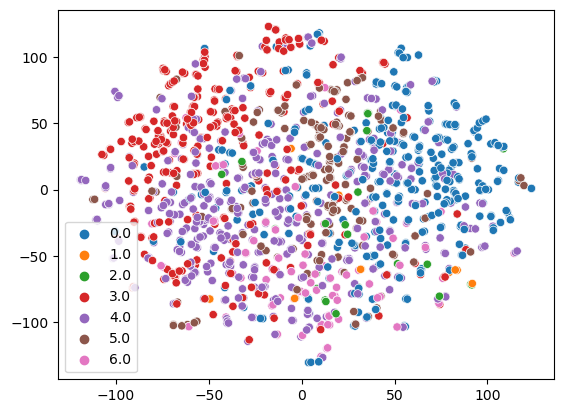

Epoch: 1 - Train Loss: nan


100%|████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.53s/it]


General - KNN F1: 0.5870628322705713 Acc: 0.5960841189267585
Iemocap - KNN F1: 0.6515658405518879 Acc: 0.6587878787878788
Meld - KNN F1: 0.4808208638748172 Acc: 0.5027075812274369


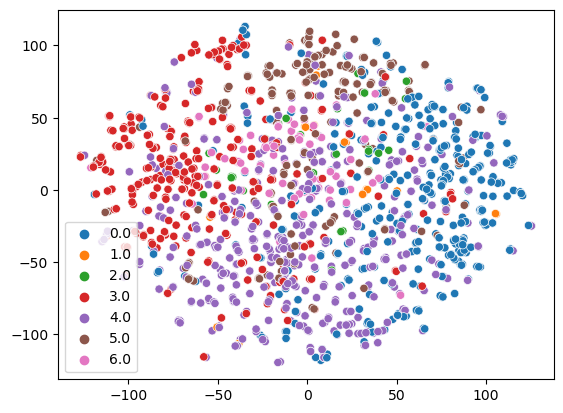

Epoch: 2 - Train Loss: nan


100%|████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.76s/it]


General - KNN F1: 0.6141464501945431 Acc: 0.6203770848440899
Iemocap - KNN F1: 0.6825478101625546 Acc: 0.6842424242424242
Meld - KNN F1: 0.5087838142653627 Acc: 0.5252707581227437


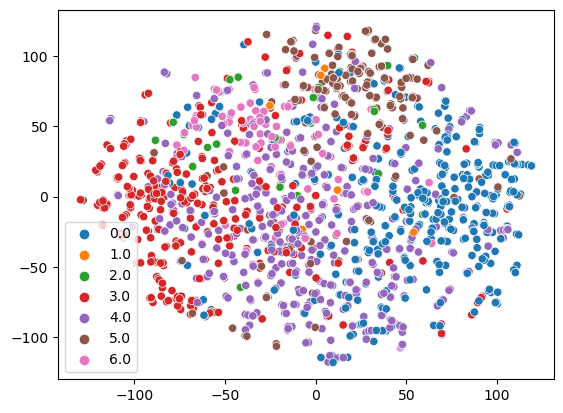

Epoch: 3 - Train Loss: nan


100%|████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.55s/it]


General - KNN F1: 0.6213590030841836 Acc: 0.6243654822335025
Iemocap - KNN F1: 0.6755032685320844 Acc: 0.676969696969697
Meld - KNN F1: 0.5392512632417628 Acc: 0.546028880866426


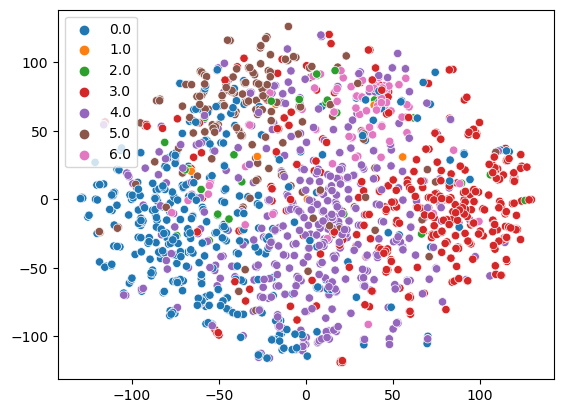

Epoch: 4 - Train Loss: nan


100%|████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.83s/it]


General - KNN F1: 0.6212310844881456 Acc: 0.6243654822335025
Iemocap - KNN F1: 0.6758423432231323 Acc: 0.6721212121212121
Meld - KNN F1: 0.5456445876990811 Acc: 0.5532490974729242


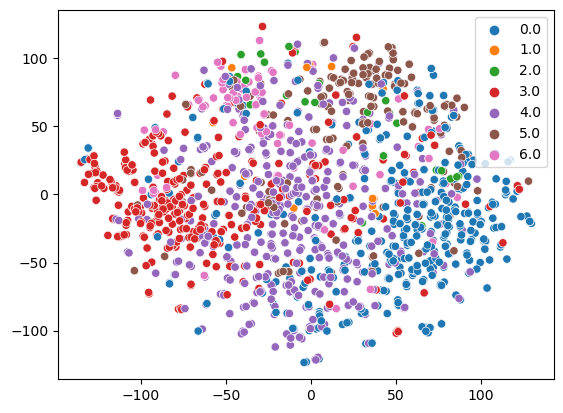

Epoch: 5 - Train Loss: nan


100%|████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.75s/it]


General - KNN F1: 0.6272705847592327 Acc: 0.6305293691080494
Iemocap - KNN F1: 0.6868883367826285 Acc: 0.6793939393939394
Meld - KNN F1: 0.5417912827872706 Acc: 0.5577617328519856


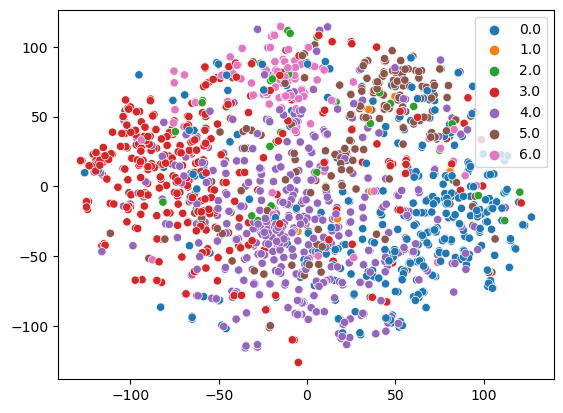

Epoch: 6 - Train Loss: nan


 73%|██████████████████████████████████████              | 151/206 [01:52<00:41,  1.34it/s]

In [ ]:
MODEL_NAME = 'sentence-transformers/all-MiniLM-L12-v2'
PATH_TO_SAVE = 'text_encoder_ready_L2_test2'
!mkdir -p {PATH_TO_SAVE}

supcon_model = TextCLIP(
    TextEncoder(MODEL_NAME, max_len=128),
    in_features_text=384,
    wide_proj=2048,
    proj_size=128,
    rate=0.2,
)

supcon_loss = SupConLoss(temperature=0.1, contrast_mode='all', base_temperature=0.1)
supcon_model.to(0)

#supcon_model = torch.compile(supcon_model)
scaler = torch.cuda.amp.GradScaler()

e = 0
old_f1 = -float('inf')
old_f1_meld = -float('inf')
old_f1_iemocap = -float('inf')

param_optimizer = list(supcon_model.named_parameters())

no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{
    'params':
    [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
    'weight_decay_rate':
    0.1
}, {
    'params':
    [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
    'weight_decay_rate':
    0.0
}]

opt = torch.optim.AdamW(optimizer_grouped_parameters, lr=5e-5, betas=(0.9, 0.98), eps=1e-8)
scheduler = torch.optim.lr_scheduler.LinearLR(opt, start_factor=0.5, total_iters=5)

epochs = 9999

while e < epochs:
    supcon_model.train()
    epoch_loss = 0.0
    proj_val = []
    targets_val = []

    proj_train = []
    targets_train = []

    preds = []

    for i, batch_indices in enumerate(tqdm(train_loader, total=len(train_loader))):
        
        batch = train_text_final.iloc[batch_indices[0]]
        sentences = list(batch["text"])
        target = torch.Tensor(lab_encoder.transform(list(batch["label"])))

        with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
            out, wide = supcon_model(sentences)
            out = out.unsqueeze(dim=1)
            loss = supcon_loss(out, labels=target)

        scaler.scale(loss).backward()
        scaler.unscale_(opt)

        torch.nn.utils.clip_grad_norm_(supcon_model.parameters(), 20.0)
        scaler.step(opt)
        scaler.update()
        opt.zero_grad(set_to_none=True)

        epoch_loss += loss.item()
        proj_train.append(np.array(wide.detach().cpu()))
        targets_train.append(np.array(target.cpu()))

        del out
        del wide
        gc.collect()
        torch.cuda.empty_cache()
        
    scheduler.step()
    proj_train = np.concatenate(proj_train, axis=0)
    targets_train = np.concatenate(targets_train, axis=0)
    
    clf = FaissKNeighbors(k=128)
    clf.fit(proj_train, np.array(targets_train, dtype=int))

    epoch_loss = epoch_loss/len(train_loader)
    supcon_model.eval()
    
    for i, batch_indices in enumerate(tqdm(test_loader, total=len(test_loader))):
        with torch.no_grad():
        
            batch = test_df_erc.iloc[batch_indices[0]]
            sentences = list(batch["text"])
            target = torch.Tensor(lab_encoder.transform(list(batch["label"])))
            
            with torch.cuda.amp.autocast(enabled=True, dtype=torch.float16) as autocast, torch.backends.cuda.sdp_kernel(enable_flash=False) as disable:
                _, wide = supcon_model(sentences)
    
            wide = np.array(wide.cpu())
            pred = clf.predict(wide)

            preds.append(pred)
            proj_val.append(wide)
            targets_val.append(np.array(target.cpu()))

            del wide
            del target
            gc.collect()
            torch.cuda.empty_cache()

    proj_val = np.concatenate(proj_val, axis=0)
    targets_val = np.concatenate(targets_val, axis=0)
    preds = np.array(np.concatenate(preds, axis=0))

    general_f1 = f1_score(targets_val, preds, average='weighted')
    general_acc = accuracy_score(targets_val, preds)
    
    meld_idx = test_df_erc[test_df_erc["source"] == "meld"].index
    iemocap_idx = test_df_erc[test_df_erc["source"] != "meld"].index
    
    general_f1_iemocap = f1_score(targets_val[iemocap_idx], preds[iemocap_idx], average='weighted')
    general_acc_iemocap = accuracy_score(targets_val[iemocap_idx], preds[iemocap_idx])
    
    general_f1_meld = f1_score(targets_val[meld_idx], preds[meld_idx], average='weighted')
    general_acc_meld = accuracy_score(targets_val[meld_idx], preds[meld_idx])
    
    print(f'General - KNN F1: {general_f1} Acc: {general_acc}')
    print(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
    print(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')

    idx = np.random.randint(len(proj_val), size=2000)

    proj_val_samp = proj_val[idx, :]
    targets_val_samp = targets_val[idx]
    tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5).fit_transform(proj_val_samp)

    sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=targets_val_samp, palette='tab10')
    plt.show()

    print(f'Epoch: {e + 1} - Train Loss: {epoch_loss}')
    e += 1

    with open(f"{PATH_TO_SAVE}/metrics_epoch_{e}.txt", "w") as f:
        f.write(f'General - KNN F1 (weighted): {general_f1} Acc: {general_acc}')
        f.write(f'Iemocap - KNN F1: {general_f1_iemocap} Acc: {general_acc_iemocap}')
        f.write(f'Meld - KNN F1: {general_f1_meld} Acc: {general_acc_meld}')
        
    if general_f1 > old_f1 or general_f1_iemocap > old_f1_iemocap or general_f1_meld > old_f1_meld:
        checkpoint = {"model": supcon_model.state_dict(),
                  "optimizer": opt.state_dict(),
                  "scaler": scaler.state_dict()}
        torch.save(checkpoint, f'{PATH_TO_SAVE}/pytorch_model_AudioTextCLIP_epoch_{e}.bin')